<a href="https://colab.research.google.com/github/rakeshgovindsuresh/Python-Practice/blob/main/arima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot as plt

# Load your data
file_path ='/content/Raw_data_1Hr_2023_site_288_Velachery_Res._Area_Chennai_CPCB_1Hr (1).csv'
df = pd.read_csv(file_path)
df.describe()
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df = df.set_index('Timestamp')

In [5]:
pm25_data = df['PM2.5 (µg/m³)'].resample('D').mean()

In [6]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(pm25_data.dropna())  # Drop NA values if any
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -7.359882
p-value: 0.000000


In [7]:
# Fit the ARIMA model
# The order (p,d,q) needs to be selected based on model analysis such as ACF and PACF plots
model = ARIMA(pm25_data, order=(1,1,1))  # Example: (1,1,1) can be changed based on your data
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:          PM2.5 (µg/m³)   No. Observations:                  365
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1322.271
Date:                Tue, 07 May 2024   AIC                           2650.542
Time:                        23:18:59   BIC                           2662.233
Sample:                    01-01-2023   HQIC                          2655.189
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6558      0.038     17.377      0.000       0.582       0.730
ma.L1         -0.9996      0.313     -3.190      0.001      -1.614      -0.385
sigma2        84.3326     25.008      3.372      0.0

In [8]:
forecast = model_fit.forecast(steps=5)
print(forecast)

2024-01-01    26.538211
2024-01-02    26.709175
2024-01-03    26.821302
2024-01-04    26.894840
2024-01-05    26.943070
Freq: D, Name: predicted_mean, dtype: float64


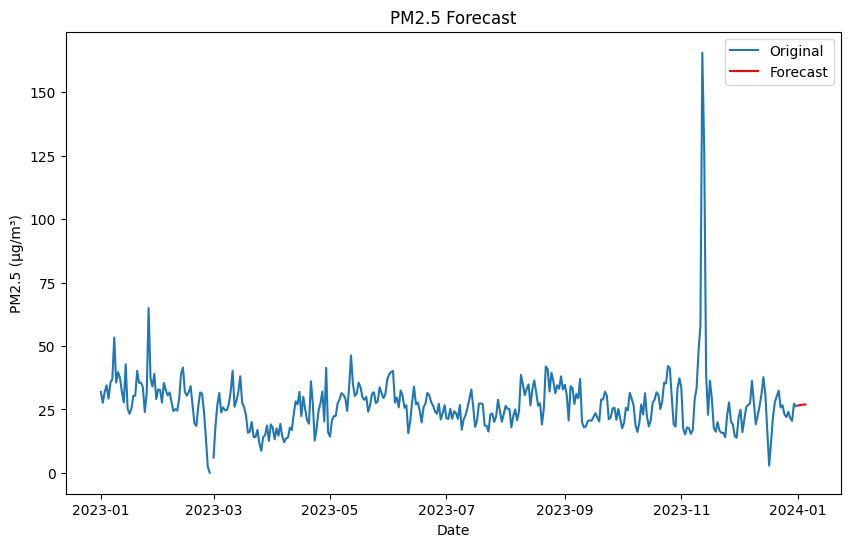

In [9]:
# Plotting original data and forecasts
plt.figure(figsize=(10, 6))
plt.plot(pm25_data, label='Original')
plt.plot(forecast, label='Forecast', color='red')
plt.title('PM2.5 Forecast')
plt.xlabel('Date')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.show()
